### Market Basket Analysis
#### by Dewansh Vishwakarma


#### Importing Library

In [20]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#### Loading the Dataset 

In [2]:
df = pd.read_csv("Groceries_dataset.csv")

#### Understanding the data 

In [3]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df.shape

(38765, 3)

In [5]:
df.index

RangeIndex(start=0, stop=38765, step=1)

In [6]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [8]:
df.isnull().sum().sort_values(ascending = False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [9]:
df['date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


C:\Users\user\AppData\Local\Temp\ipykernel_9052\2400879760.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['Date'])


In [10]:
df.head()

,Member_number,Date,itemDescription,date
0,1808,21-07-2015,tropical fruit,2015-07-21
1,2552,05-01-2015,whole milk,2015-01-05
2,2300,19-09-2015,pip fruit,2015-09-19
3,1187,12-12-2015,other vegetables,2015-12-12
4,3037,01-02-2015,whole milk,2015-02-01


#### Data Preprocessing

##### Using apriori to extract  item sets, support, confidence, and lift values coloumn

In [26]:
transactions = df.groupby(['Member_number'])['itemDescription'].apply(list).reset_index()
transactions.head()

,Member_number,itemDescription
0,1000,"[soda, canned beer, sausage, sausage, whole mi..."
1,1001,"[frankfurter, frankfurter, beef, sausage, whol..."
2,1002,"[tropical fruit, butter milk, butter, frozen v..."
3,1003,"[sausage, root vegetables, rolls/buns, deterge..."
4,1004,"[other vegetables, pip fruit, root vegetables,..."


In [28]:
output_file_path = r'C:\Users\user\AppData\Local\Programs\Python\Python311\Scripts\Task\Market Basket Analysis\transactions.csv'

# Save the filtered_rules DataFrame as a CSV file
transactions.to_csv(output_file_path, index=False)

print(f"transactions saved to {output_file_path}")

transactions saved to C:\Users\user\AppData\Local\Programs\Python\Python311\Scripts\Task\Market Basket Analysis\transactions.csv


In [18]:
# Convert the item lists into a one-hot encoded format (binary matrix)
basket_sets = transactions['itemDescription'].str.join('|').str.get_dummies()
basket_sets = basket_sets.astype(bool)

In [21]:
# Generate Frequent Item Sets
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

In [22]:
# Calculate Association Rules
association_rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [23]:
# Filter association rules based on your criteria (support, confidence, lift)
min_support = 0.05
min_confidence = 0.3
min_lift = 1.0
filtered_rules = association_rules_df[
    (association_rules_df['support'] >= min_support) &
    (association_rules_df['confidence'] >= min_confidence) &
    (association_rules_df['lift'] >= min_lift)
]


In [24]:
# Print the filtered association rules
filtered_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(other vegetables),0.119548,0.376603,0.050795,0.424893,1.128223,0.005773,1.083966,0.129082
2,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
5,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857
7,(bottled beer),(rolls/buns),0.158799,0.349666,0.063109,0.397415,1.136555,0.007582,1.079240,0.142829
8,(bottled beer),(soda),0.158799,0.313494,0.055156,0.347334,1.107946,0.005374,1.051849,0.115821


In [29]:
output_file_path = r'C:\Users\user\AppData\Local\Programs\Python\Python311\Scripts\Task\Market Basket Analysis\filtered_rules.csv'

# Save the filtered_rules DataFrame as a CSV file
filtered_rules.to_csv(output_file_path, index=False)

print(f"Filtered rules saved to {output_file_path}")

Filtered rules saved to C:\Users\user\AppData\Local\Programs\Python\Python311\Scripts\Task\Market Basket Analysis\filtered_rules.csv


### Data Visualization 

#### Top 10 most frequently purchased items

In [12]:
# Distribution of item sold 
Item_distr = df.groupby(by = 'itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency', ascending = False).head(10)

bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

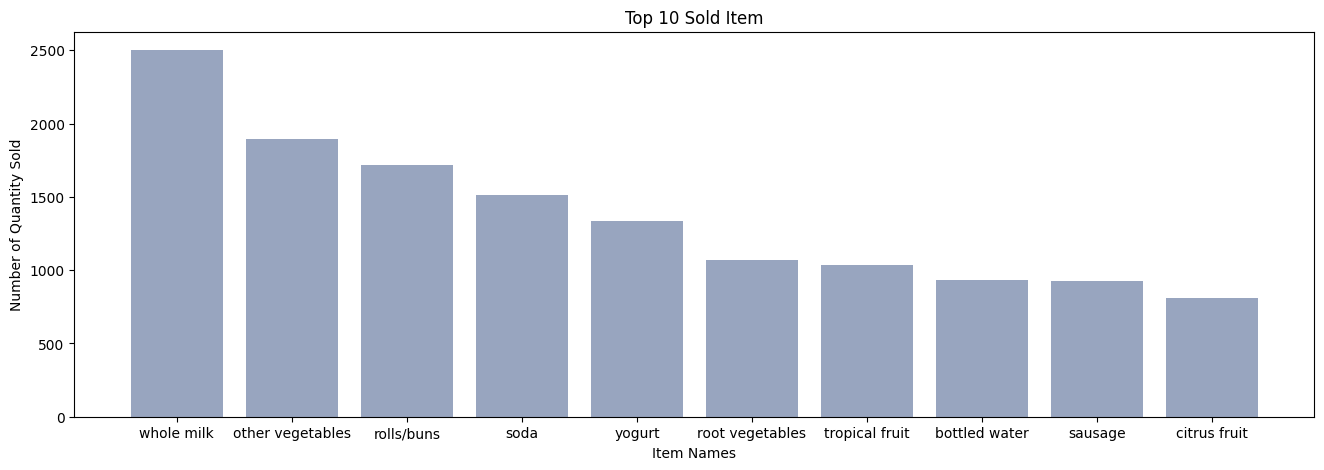

In [13]:
fig1= plt.figure(figsize=(16, 5))


plt.bar(x_pos, height, color=(0.2, 0.3, 0.5, 0.5))

plt.title("Top 10 Sold Item")
plt.xlabel("Item Names")
plt.ylabel("Number of Quantity Sold")
plt.xticks(x_pos, bars)
plt.show()


##### Number of Item Sold By The Month

In [14]:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample data to monthly frequency and count items
monthly_counts = df.resample("M")["itemDescription"].count()

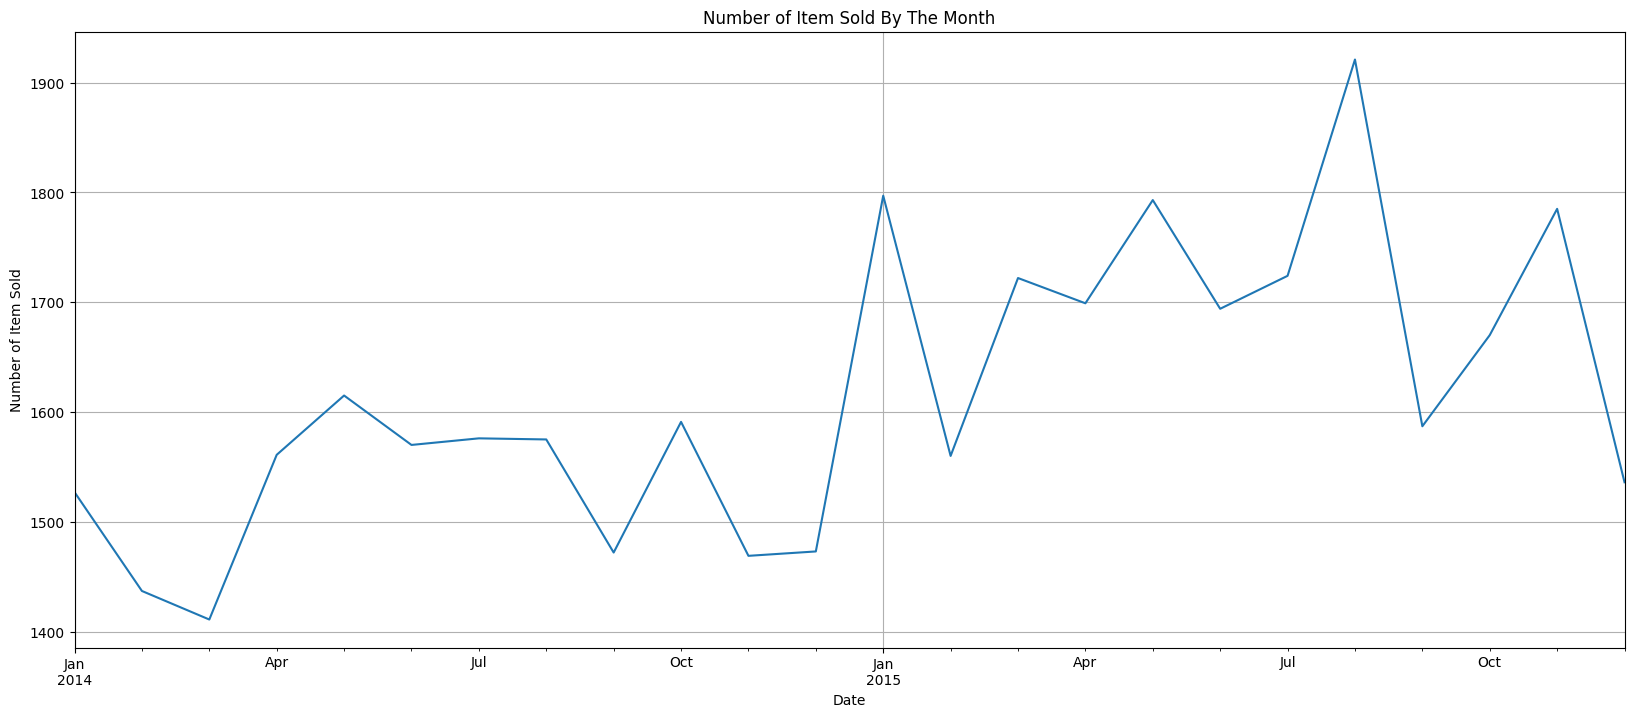

In [15]:
# Plot the data
fig, ax = plt.subplots(figsize=(20, 8))
monthly_counts.plot(ax=ax, grid=True, title="Number of Item Sold By The Month")
ax.set(xlabel="Date", ylabel="Number of Item Sold")
plt.show()

#### Visualize item associations using a heatmap

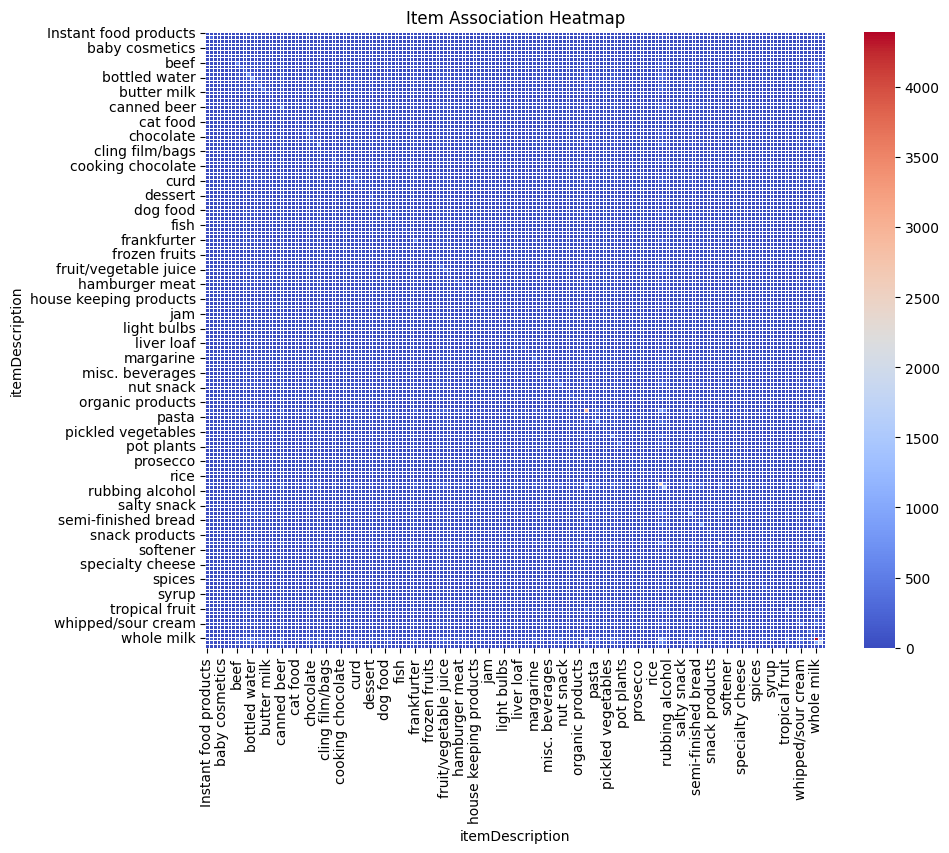

In [16]:
item_matrix = df.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().fillna(0)
association_matrix = item_matrix.T.dot(item_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(association_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Item Association Heatmap')
plt.show()


#### Analyze purchasing behavior over time

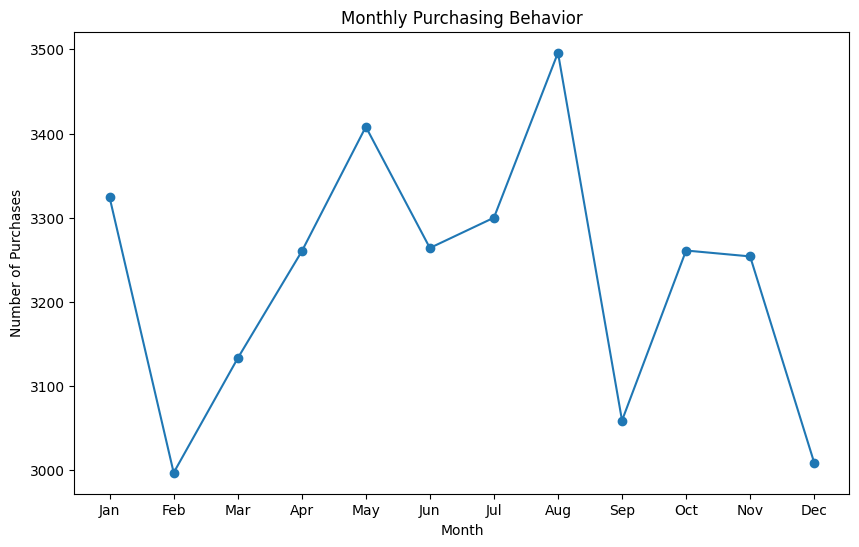

In [17]:
df['Date'] = pd.to_datetime(df['date'])
df['Month'] = df['Date'].dt.month
monthly_purchases = df.groupby('Month')['itemDescription'].count()
plt.figure(figsize=(10, 6))
plt.plot(monthly_purchases.index, monthly_purchases.values, marker='o')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.title('Monthly Purchasing Behavior')
plt.show()